<a href="https://colab.research.google.com/github/Diwakarmogarala/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Overview of my project
This project is about developing a dataset for stroke prediction. Initially, I want to find the most common disease in the US so that I can work on it. So on using the dataset https://data.cdc.gov/api/views/g4ie-h725/rows.json?accessType=DOWNLOAD, I came to know that Cardiovascular disease is the most commonly affected in the US next to cancer. Here I want to prepare a dataset that will account diabetes, heart disease and obesity factor from already created datasets. Here I want to see the etiological pattern and I want to prepare my dataset for a machine learning model, so I would like to do data balance if there is any imbalance in my target column using the imblearn module. On researching the etiopathology of stroke, I came to know that Diabetes, hypertension, hyperlipidemia and obesity are causative factors of atherosclerosis where it leads to ischemic attacks such as MI and stroke. So I want blood pressure, sugar levels, lipid test in my dataset. So I used these following datasets.


### About datasets.

#### https://data.cdc.gov/api/views/g4ie-h725/rows.json?accessType=DOWNLOAD
In order to enable states, territories, and large metropolitan areas to consistently define, gather, and report chronic disease data that are crucial to public health practice, the CDC's Division of Population Health offers a cross-cutting set of 124 indicators that were developed by consensus. The CDI website not only offers access to state-specific indicator data but also acts as a portal to other sources of data and information.

#### https://data.world/cms/heart-attack-payment-hospital
The dataset contains provider data related to payments made to patients who have had heart attacks. Provider payment information for a 30-day cardiac attack patient treatment episode is included in this data collection.

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

After accounting for 31% of all fatalities worldwide, cardiovascular diseases (CVDs) are the leading cause of death, killing an estimated 17.9 million lives annually. Heart attacks and strokes account for four out of every five CVD deaths, with persons under the age of 70 accounting for one-third of these untimely deaths. Eleven characteristics in this dataset can be used to predict the likelihood of a heart disease, as heart failure is a typical event brought on by CVDs.

When it comes to early identification and care, a machine learning model can be very helpful for those who have cardiovascular disease or who are at high risk for developing it because they have one or more risk factors, such as diabetes, hypertension, hyperlipidemia, or an existing illness.

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

This is about stroke datasets. Stroke is the 2nd most caused disease. It is caused by decreased blood flow to the brain it may be due to an ischaemic attack or hemorrhagic attack. There will be an output column to state stroke or not with limited columns.

In [1]:
# Importing all the packages and modules that I am going to use in this project.
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.wkt import loads
from imblearn.under_sampling import RandomUnderSampler

In [2]:
def json_import(url = ''):
  """(str) -> pandas.core.frame.DataFrame
  Here I created the json_import function where I use the JSON file download link as input. Using the requests module I extracted the contents from the url.
  then I created a JSON file in my directory to write the contents in the url. Then I opened the JSON file using json module. Here I created a column_list for
  storing column names in an order. There is an issue in extracting column names because it has colons so I replace it with empty string and then started to append
  empty list. In my json file there was a list of data so I created a dataframe using that data and column names as newly created list.
  """
  text = requests.get(url)
  with open('data.json','w') as info:
    info.write(text.text)
  disease_json = json.load(open('data.json'))
  column_list = []
  for each_column in disease_json['meta']['view']['columns']:
    column_list.append(each_column['fieldName'].replace(':','').strip())
  disease = pd.DataFrame(disease_json['data'], columns=column_list)
  return disease

In [3]:
def label_Encoding(data=pd.DataFrame({'G':[1,2,3]}),column = 'column', type = 'int'):
  """(pandas.core.frame.DataFrame, str, int) -> None
  Here we are using label encoder where it will convert column values into our desired data types. Its because while we are merging the datasets, some won't merge because of different datatypes
  and during machine learning for the easy computer understandable purpose we convert the data type to integer.
  """
  from sklearn.preprocessing import LabelEncoder
  le= LabelEncoder()
  data[column] = le.fit_transform(data[column]).astype(type)

In [4]:
def value_replace(data = pd.DataFrame({'G':[1,2,3]}), column = 'column', replace = {'replacing value':'What to replace'}):
  """(pandas.core.frame.DataFrame, str, dict) -> None
  Here we find the unique values in the respective column. In the column we should know the details about the values and we should also have an assumption as to what we are going to convert the data.
  initially we give our dataset name then we provide the column name where we need to replace and also we give details of what to be converted as a key and how it is replaced as values in a dictionary.
  We need to provide values for all unique values in the dictionary.

  Using for loop I acessed the key and values and replaced it with replace function.
  """

  for old_value, new_value in replace.items():
    data[column] = data[column].replace(old_value, new_value)

In [5]:
# In a new variable called disease I loaded the data frame created using https://data.cdc.gov/api/views/g4ie-h725/rows.json?accessType=DOWNLOAD
disease = json_import('https://data.cdc.gov/api/views/g4ie-h725/rows.json?accessType=DOWNLOAD')

In [6]:
# This is dataframe overview
pd.options.display.max_columns=50
disease.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,response,datavalueunit,datavaluetype,datavalue,datavaluealt,datavaluefootnotesymbol,datavaluefootnote,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,stratificationcategory2,stratification2,stratificationcategory3,stratification3,geolocation,responseid,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2,stratificationcategoryid3,stratificationid3
0,row-4e8u_kb3k_ruva,00000000-0000-0000-C53E-FCF15DC98385,0,1675079585,None,1675079742,None,{ },2010,2010,OR,Oregon,NVSS,Cardiovascular Disease,Mortality from heart failure,None,None,Number,30,30,None,None,None,None,Race/Ethnicity,American Indian or Alaska Native,None,None,None,None,POINT (-120.15503132599969 44.56744942400047),None,41,CVD,CVD1_4,NMBR,RACE,AIAN,None,None,None,None
1,row-8djq~36zn.35a7,00000000-0000-0000-0F96-C4CBF3FA06C0,0,1675079585,None,1675079679,None,{ },2019,2019,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,None,%,Crude Prevalence,29.5,29.5,None,None,24.9,34.7,Gender,Female,None,None,None,None,POINT (-111.76381127699972 34.865970280000454),None,04,ALC,ALC1_1,CRDPREV,GENDER,GENF,None,None,None,None
2,row-9xyn-jp2e.7r5u,00000000-0000-0000-BEA0-84C8EA112F1E,0,1675079585,None,1675079679,None,{ },2019,2019,OH,Ohio,YRBSS,Alcohol,Alcohol use among youth,None,%,Crude Prevalence,22.5,22.5,None,None,17.0,29.1,Gender,Male,None,None,None,None,POINT (-82.40426005599966 40.06021014100048),None,39,ALC,ALC1_1,CRDPREV,GENDER,GENM,None,None,None,None
3,row-d63b_znu7_gqgu,00000000-0000-0000-F8B5-811BD962B23B,0,1675079585,None,1675079679,None,{ },2019,2019,US,United States,YRBSS,Alcohol,Alcohol use among youth,None,%,Crude Prevalence,13.9,13.9,None,None,10.4,18.4,Race/Ethnicity,"Asian, non-Hispanic",None,None,None,None,None,None,59,ALC,ALC1_1,CRDPREV,RACE,ASN,None,None,None,None
4,row-at5u_mu2v-v4dk,00000000-0000-0000-177B-9789FA975FAA,0,1675079585,None,1675079679,None,{ },2015,2015,VI,Virgin Islands,YRBSS,Alcohol,Alcohol use among youth,None,%,Crude Prevalence,None,None,-,No data available,None,None,Gender,Male,None,None,None,None,POINT (-64.896335 18.335765),None,78,ALC,ALC1_1,CRDPREV,GENDER,GENM,None,None,None,None


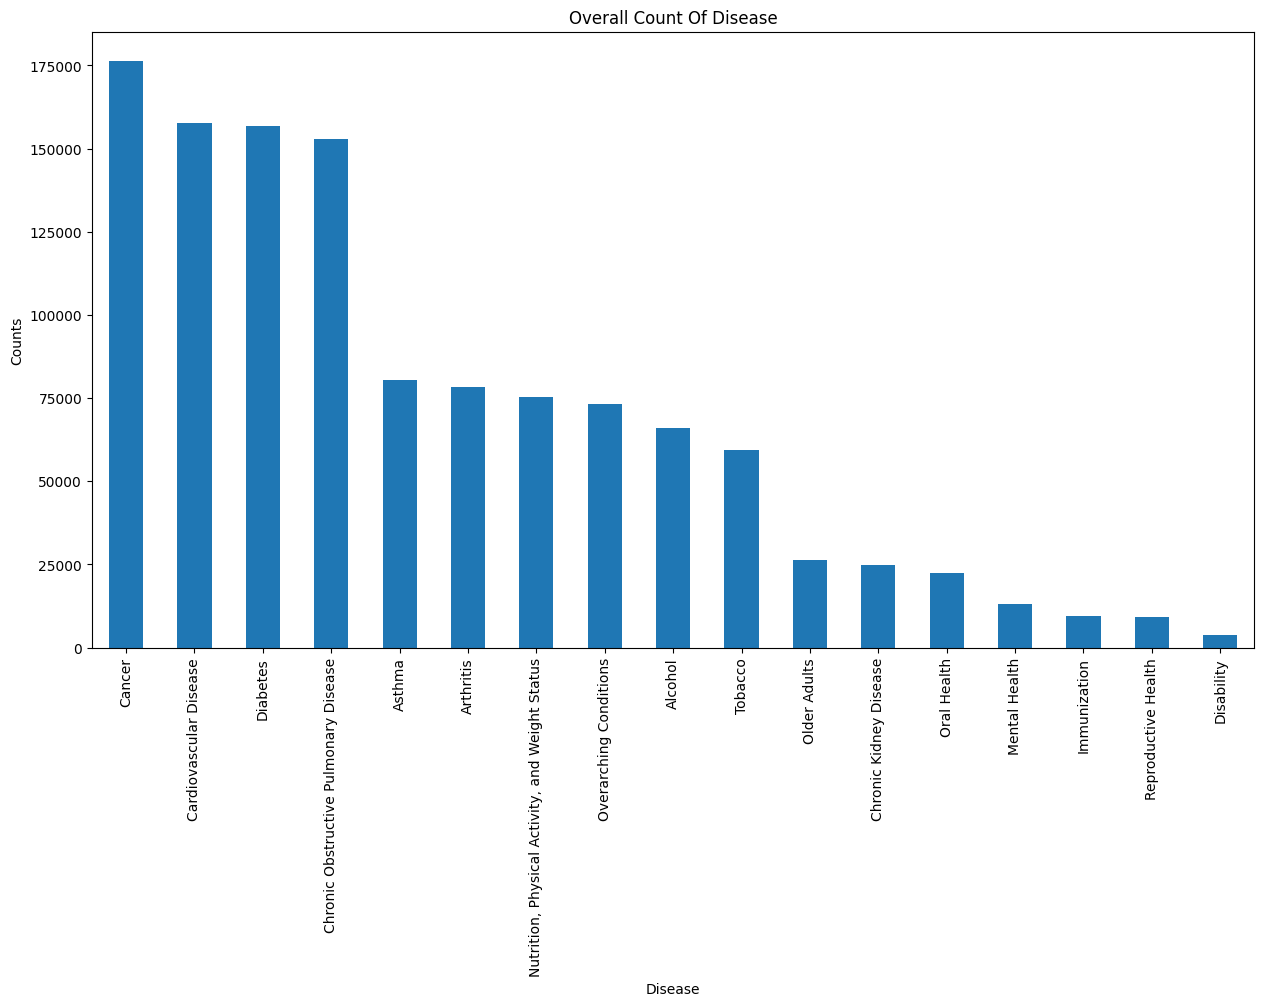

In [7]:
# I want to find what are the cases that were mostly seen in USA. So I did value_counts for the topic column and obtained column was plotted as a bar graph.
disease.topic.value_counts().plot(kind = 'bar', figsize=(15,8))
plt.title('Overall Count Of Disease')
plt.xlabel('Disease')
plt.ylabel('Counts')
plt.show()
# Datasets regarding cancer were complex because they go with images or they are using the mutated gene sequencing so I would like to select next followed disease.
# i.e.. Cardiovascular Disease.

In [8]:
# Here Iam taking Year start and topic column seperately and then i am pivoting the year start as index and topics as columns and I am and the values should be their
#categorical value_counts.
cvd = disease[['yearstart','topic']].pivot_table(index = 'yearstart', columns = 'topic', values = 'yearstart', aggfunc= 'value_counts')
cvd

topic,Alcohol,Arthritis,Asthma,Cancer,Cardiovascular Disease,Chronic Kidney Disease,Chronic Obstructive Pulmonary Disease,Diabetes,Disability,Immunization,Mental Health,"Nutrition, Physical Activity, and Weight Status",Older Adults,Oral Health,Overarching Conditions,Reproductive Health,Tobacco
yearstart,,,,,,,,,,,,,,,,,
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0
2008,NaN,NaN,NaN,19968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,19968.0,NaN,NaN,NaN,55.0,NaN,NaN,55.0,NaN,NaN,55.0,367.0,NaN,NaN
2010,1282.0,NaN,2442.0,19968.0,8847.0,1227.0,7518.0,3970.0,424.0,NaN,NaN,164.0,1680.0,NaN,1975.0,NaN,NaN
2011,5467.0,8700.0,5902.0,19968.0,14723.0,2305.0,11910.0,13219.0,424.0,870.0,1195.0,4785.0,1680.0,NaN,6105.0,380.0,4730.0
2012,5839.0,5220.0,5902.0,22463.0,10863.0,2305.0,11910.0,12349.0,424.0,870.0,1195.0,4245.0,3420.0,3855.0,6975.0,855.0,4995.0
2013,6124.0,8700.0,7171.0,21593.0,15880.0,2305.0,14016.0,14431.0,424.0,870.0,1195.0,10528.0,1680.0,327.0,6975.0,869.0,5714.0
2014,5718.0,5220.0,8494.0,22463.0,13461.0,2305.0,17103.0,14947.0,424.0,870.0,1195.0,4245.0,3420.0,3841.0,6975.0,827.0,5253.0


Text(0, 0.5, 'Counts')

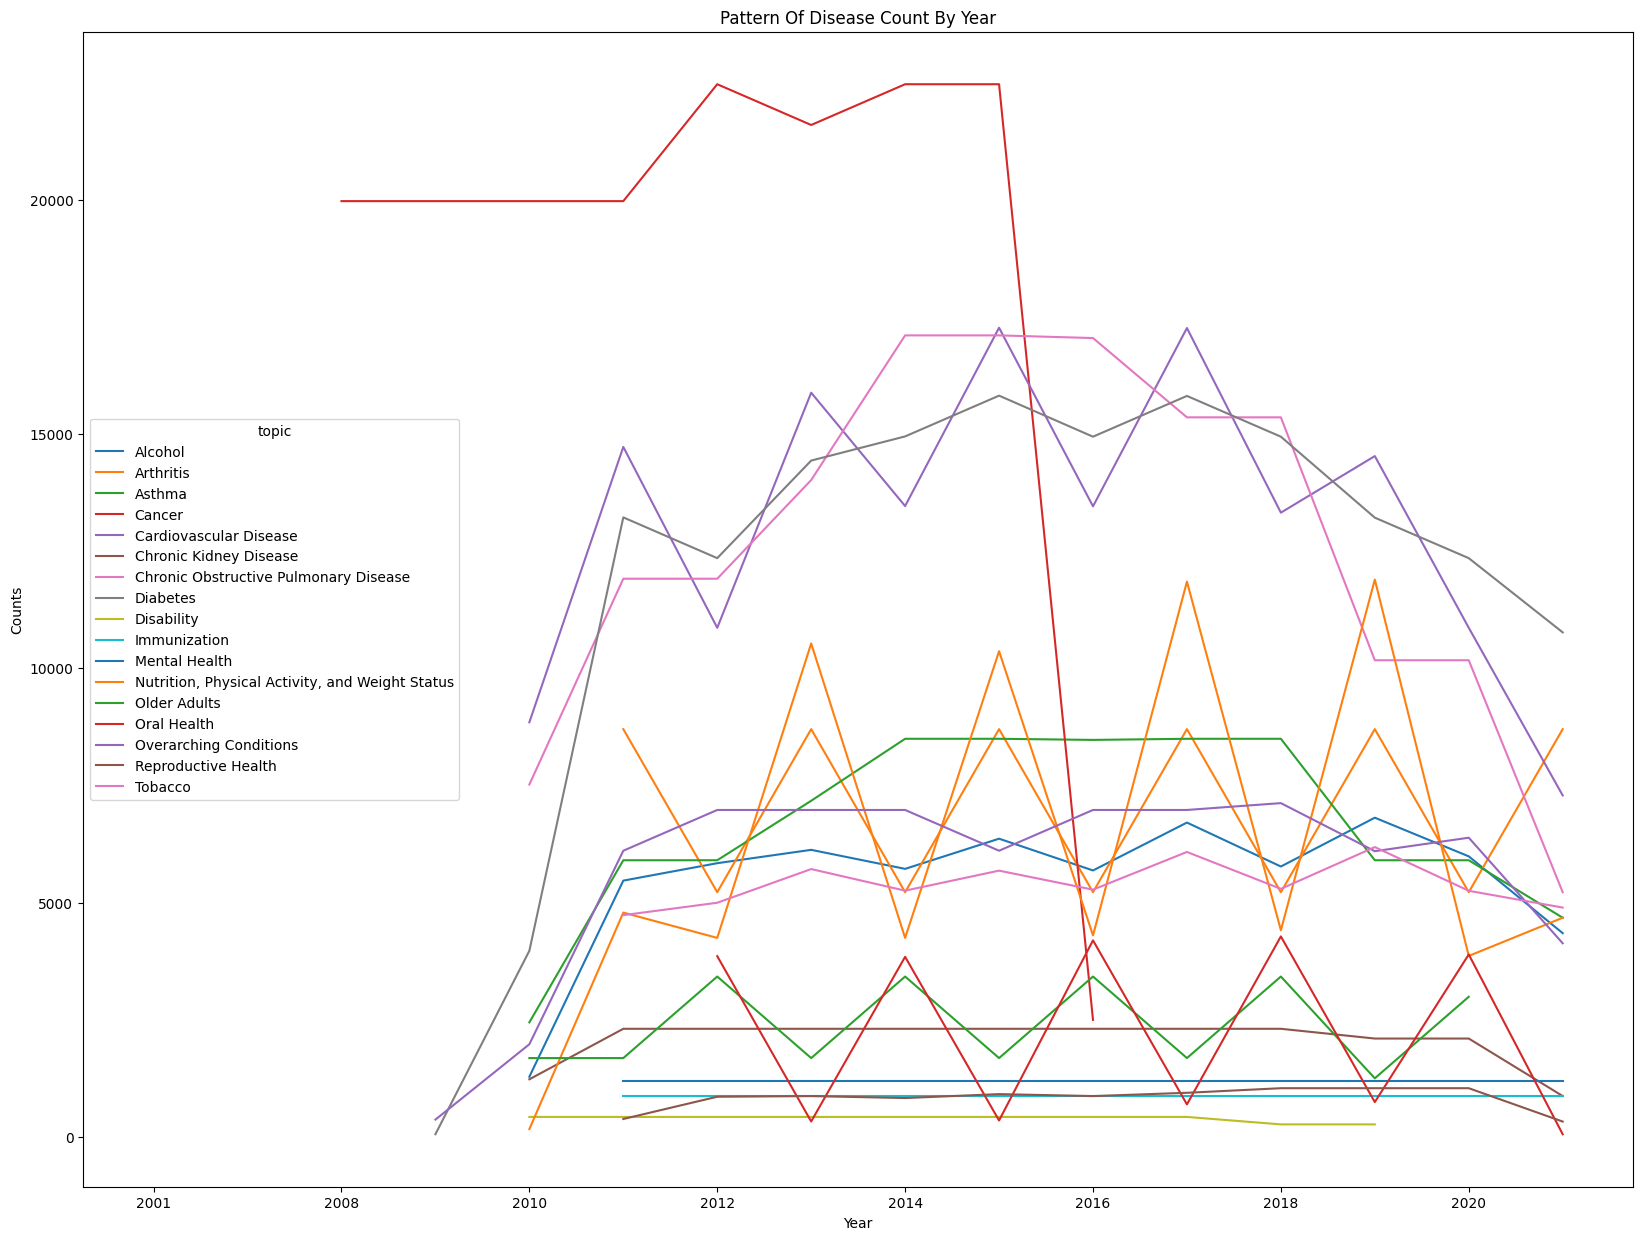

In [9]:
# Plotting above dataframe columns with index on x axis and different columns as line graph.
cvd.plot(figsize=(20,15))
plt.title('Pattern Of Disease Count By Year')
plt.xlabel('Year')
plt.ylabel('Counts')

## Graph Overview
When we see this graph we can tell that cancer cases are high initially and then it gradually decreases from 2015 later COPD Hypertension and Diabetes are in similar ranges. In the end, diabetes is the top one, but most recorded were cardiovascular diseases where it was an irregular pattern.

Text(0.5, 1.0, 'Cardiovascular Disease Yearly Count ')

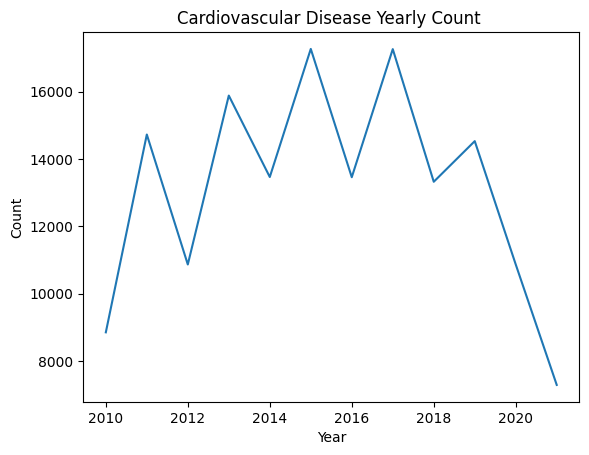

In [10]:
# Here I am filtering the dataset containing only cardiovascular disease
heart_disease = disease[disease['topic'] == 'Cardiovascular Disease']
cvd['Cardiovascular Disease'].plot() # Plotting cardiovascular disease count yearly.
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Cardiovascular Disease Yearly Count ')

<ipython-input-11-b4a5ed2e0604>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  geo_earth = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-11-b4a5ed2e0604>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease['geometry'] = heart_disease['geolocation'].apply(lambda geo: loads(geo) if not pd.isna(geo) else None)
<ipython-input-11-b4a5ed2e0604>:54: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  p

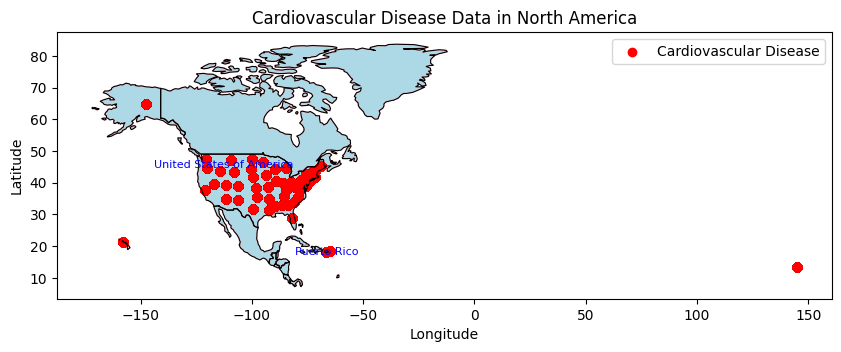

In [11]:
import geopandas as gpd
import pandas as pd
from shapely.wkt import loads
import matplotlib.pyplot as plt

# Load the natural earth dataset
geo_earth = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for North America
geo_earth = geo_earth[geo_earth['continent'] == 'North America']

# Convert 'GeoLocation' to Shapely Point geometries
heart_disease['geometry'] = heart_disease['geolocation'].apply(lambda geo: loads(geo) if not pd.isna(geo) else None)

# Convert to GeoDataFrame
cvd_geo = gpd.GeoDataFrame(heart_disease, geometry='geometry')

# Set CRS for cvd_geo (assuming it's the same as geo_earth)
cvd_geo = cvd_geo.set_crs(geo_earth.crs)

# Plotting the base map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot North America map
geo_earth.plot(ax=ax, color='lightblue', edgecolor='pink', label='North America')

# Plot the cardiovascular disease data
cvd_geo.plot(ax=ax, color='red', label='Cardiovascular Disease')

# Plot state boundaries
geo_earth.boundary.plot(ax=ax, linewidth=0.8, color='black')

# Mark each state where cardiovascular disease points are located
for idx, state in geo_earth.iterrows():
    state_name = state['name']
    state_boundary = state['geometry']

    # Check if there are cardiovascular disease points in the state
    points_in_state = cvd_geo[cvd_geo.intersects(state_boundary)]

    if not points_in_state.empty:
        # Get the centroid of the state boundary
        centroid = state_boundary.centroid

        # Plot a marker at the centroid with the state name
        ax.annotate(state_name, (centroid.x, centroid.y), color='blue', fontsize=8, ha='center', va='center')

# Title and labels
ax.set_title('Cardiovascular Disease Data in North America')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show legend
plt.legend()

# Show the plot
plt.show()


## Graph
 These are the places where cardiovascular cases are collected in USA.

In [12]:
# I am going to delete the columns with no values.
def del_empty_columns(dataset = pd.DataFrame({'g':[1,2,3,]})):
  """(pandas.core.frame.DataFrame) -> None
  Here we are removing fully emptied columns. Initially, we are getting how many null data in respective columns
  we are making them into a dictionary where keys are columns and the values as their count. Now using for loop we are accessing the keys and values.
  If any column has null data count as total number of rows, then we were removing the column from the dataframe
  """
  dataset_nulldata = dict(dataset.isnull().sum())
  for column,count in dataset_nulldata.items():

    if dataset_nulldata[column] == dataset.shape[0]:
      del dataset[column]

# Running the function using our dataframe
del_empty_columns(dataset = heart_disease)


In [13]:
heart_disease.head()

,sid,id,position,created_at,updated_at,meta,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,datavaluefootnotesymbol,datavaluefootnote,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,geometry
0,row-4e8u_kb3k_ruva,00000000-0000-0000-C53E-FCF15DC98385,0,1675079585,1675079742,{ },2010,2010,OR,Oregon,NVSS,Cardiovascular Disease,Mortality from heart failure,None,Number,30,30,None,None,None,None,Race/Ethnicity,American Indian or Alaska Native,POINT (-120.15503132599969 44.56744942400047),41,CVD,CVD1_4,NMBR,RACE,AIAN,POINT (-120.15503132599969 44.56744942400047)
104,row-2qrj_3n8m.iw22,00000000-0000-0000-CB46-4A4FFB158F81,0,1675079585,1675079742,{ },2013,2013,IN,Indiana,NVSS,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Crude Rate,113.1,113.1,None,None,109.4,116.8,Gender,Male,POINT (-86.14996019399968 39.766910452000445),18,CVD,CVD1_4,CRDRATE,GENDER,GENM,POINT (-86.14996019399968 39.766910452000445)
1196,row-6us3_haik-v3u5,00000000-0000-0000-6A7F-42BCC641D0C9,0,1675079585,1675079742,{ },2017,2017,CA,California,NVSS,Cardiovascular Disease,Mortality from heart failure,None,Number,17441,17441,None,None,None,None,Gender,Female,POINT (-120.99999953799971 37.63864012300047),06,CVD,CVD1_4,NMBR,GENDER,GENF,POINT (-120.99999953799971 37.63864012300047)
1202,row-3ww3-e9cr.r4q9,00000000-0000-0000-E16D-D46813478D54,0,1675079585,1675079742,{ },2010,2010,OK,Oklahoma,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,"cases per 100,000",Crude Rate,148.4,148.4,None,None,142.9,153.9,Gender,Female,POINT (-97.52107021399968 35.47203135600046),40,CVD,CVD1_3,CRDRATE,GENDER,GENF,POINT (-97.52107021399968 35.47203135600046)
1209,row-ns6r_wd5q_nge7,00000000-0000-0000-2CA5-AF687CDCD5E6,0,1675079585,1675079742,{ },2020,2020,OK,Oklahoma,NVSS,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Age-adjusted Rate,164.8,164.8,None,None,148.4,181.2,Race/Ethnicity,"Black, non-Hispanic",POINT (-97.52107021399968 35.47203135600046),40,CVD,CVD1_4,AGEADJRATE,RACE,BLK,POINT (-97.52107021399968 35.47203135600046)


Text(0, 0.5, 'Count')

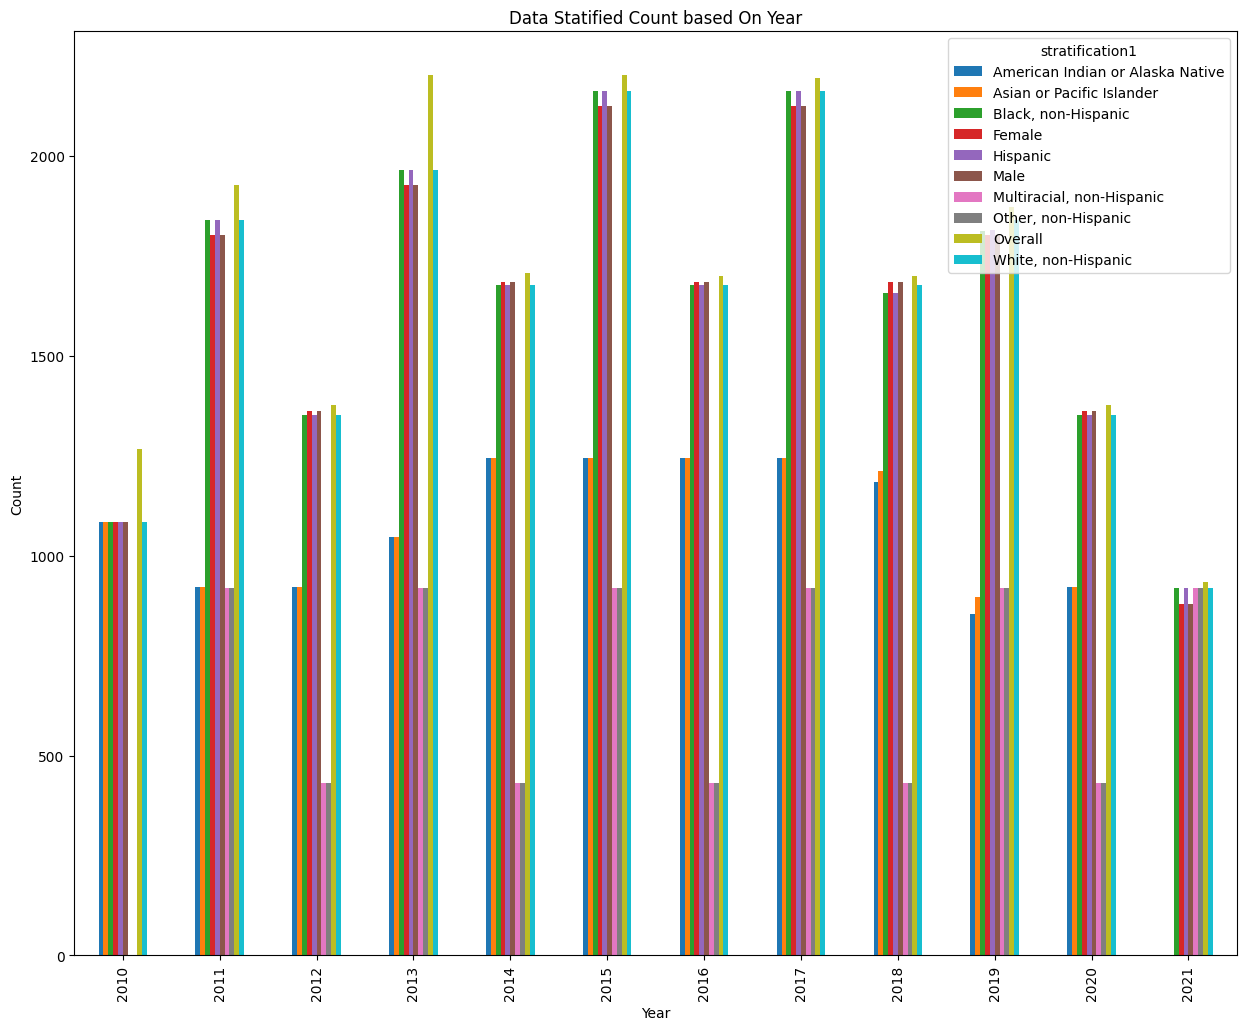

In [14]:
# Here the dataset was stratified like this. In every year the proportion was similar because the data may be standardized.
cvd_stratify = heart_disease[['yearstart','stratification1']].pivot_table(index = 'yearstart', columns = 'stratification1', values = 'stratification1', aggfunc= 'value_counts')
cvd_stratify.plot(kind = 'bar', figsize = (15,12))
plt.title('Data Statified Count based On Year')
plt.xlabel('Year')
plt.ylabel('Count')

https://data.world/cms/heart-attack-payment-hospital

In [15]:
heart = pd.read_csv('https://query.data.world/s/ohawsmy5ofjjn2mtchfe5j7mclfijt?dws=00000')

In [16]:
# Here in this dataset we have a column name Payment measure name in that we have Payment for heart attack patients. I am collecting rows with Payment measure name column as Payment for heart attack patients
heart = heart[heart['Payment measure name']=='Payment for heart attack patients']
heart.head()

,Provider ID,Hospital name,Address,City,State,ZIP Code,County name,Phone number,Payment measure name,Payment measure ID,Payment category,Denominator,Payment,Lower estimate,Higher estimate,Payment footnote,Value of care display name,Value of care display ID,Value of care category,Value of care footnote,Measure start date,Measure End Date,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for heart attack patients,PAYM_30_AMI,No Different than the National Average Payment,53,$23171.00,"$20,404","$26,226",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
3,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Payment for heart attack patients,PAYM_30_AMI,Number of Cases Too Small,Not Available,NaN,Not Available,Not Available,1 - The number of cases/patients is too few to...,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Not Available,13 - Results cannot be calculated for this rep...,07/01/2012,06/30/2015,"209 NORTH MAIN STREET\nWEDOWEE, AL 36278\n"
6,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Payment for heart attack patients,PAYM_30_AMI,Less than the National Average Payment,186,$20007.00,"$18,418","$21,732",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and lower payment,NaN,07/01/2012,06/30/2015,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL 35801\n"
9,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99508,ANCHORAGE,9072123675,Payment for heart attack patients,PAYM_30_AMI,No Different than the National Average Payment,318,$24309.00,"$22,554","$26,252",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"BOX 196604\nANCHORAGE, AK 99508\n"
12,20018,YUKON KUSKOKWIM DELTA REG HOSPITAL,PO BOX 287,BETHEL,AK,99559,BETHEL,9075436300,Payment for heart attack patients,PAYM_30_AMI,Number of Cases Too Small,Not Available,NaN,Not Available,Not Available,1 - The number of cases/patients is too few to...,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Not Available,13 - Results cannot be calculated for this rep...,07/01/2012,06/30/2015,"PO BOX 287\nBETHEL, AK 99559\n"


In [17]:
# In order to convert the value into an numeric we need to make the value into numeric. So I did these.
heart['Lower estimate'] = heart['Lower estimate'].str.replace('$','')
heart['Lower estimate'] = heart['Lower estimate'].str.replace(',','')
heart['Lower estimate'] = heart['Lower estimate'].str.replace('Not Available','')
heart['Lower estimate'] = pd.to_numeric(heart['Lower estimate'])

heart['Higher estimate'] = heart['Higher estimate'].str.replace('$','')
heart['Higher estimate'] = heart['Higher estimate'].str.replace(',','')
heart['Higher estimate'] = heart['Higher estimate'].str.replace('Not Available','')
heart['Higher estimate'] = pd.to_numeric(heart['Higher estimate'])

heart['Payment'] = heart['Payment'].str.replace('$','')
heart['Payment'] = heart['Payment'].str.replace(',','')
heart['Payment'] = heart['Payment'].str.replace('Not Available','')
heart['Payment'] = pd.to_numeric(heart['Payment'])

<ipython-input-17-398a51b0fe71>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  heart['Lower estimate'] = heart['Lower estimate'].str.replace('$','')
<ipython-input-17-398a51b0fe71>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  heart['Higher estimate'] = heart['Higher estimate'].str.replace('$','')
<ipython-input-17-398a51b0fe71>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  heart['Payment'] = heart['Payment'].str.replace('$','')


In [18]:
heart.columns

Index(['Provider ID', 'Hospital name', 'Address', 'City', 'State', 'ZIP Code',
       'County name', 'Phone number', 'Payment measure name',
       'Payment measure ID', 'Payment category', 'Denominator', 'Payment',
       'Lower estimate', 'Higher estimate', 'Payment footnote',
       'Value of care display name', 'Value of care display ID',
       'Value of care category', 'Value of care footnote',
       'Measure start date', 'Measure End Date', 'Location'],
      dtype='object')

In [19]:
# I am creating a dataframe by extracting lower estimate, payment, higher estimate and State columns.
heart_graph = heart[['Lower estimate', 'Payment', 'Higher estimate','State']]
heart_graph

,Lower estimate,Payment,Higher estimate,State
0,20404.0,23171.0,26226.0,AL
3,NaN,NaN,NaN,AL
6,18418.0,20007.0,21732.0,AL
9,22554.0,24309.0,26252.0,AK
12,NaN,NaN,NaN,AK
...,...,...,...,...
14443,19758.0,22231.0,25067.0,TX
14444,NaN,NaN,NaN,WI
14448,21786.0,23587.0,25644.0,TX
14449,NaN,NaN,NaN,TX


In [20]:
# Then I grouped States and remaining all columns as mean according to the respective states data.
heart_graph_LE = heart_graph.groupby(by = 'State').agg('mean')
heart_graph_LE

,Lower estimate,Payment,Higher estimate
State,,,
AK,20415.600000,22678.800000,25217.600000
AL,20457.400000,22540.775000,24847.075000
AR,20752.068966,22806.000000,25087.137931
AS,NaN,NaN,NaN
AZ,21208.555556,23389.111111,25806.355556
CA,21089.203883,23437.815534,26079.820388
CO,20503.225806,22827.000000,25455.387097
CT,21266.962963,23319.333333,25584.037037
DC,20295.428571,22710.428571,25442.000000


<Axes: xlabel='State'>

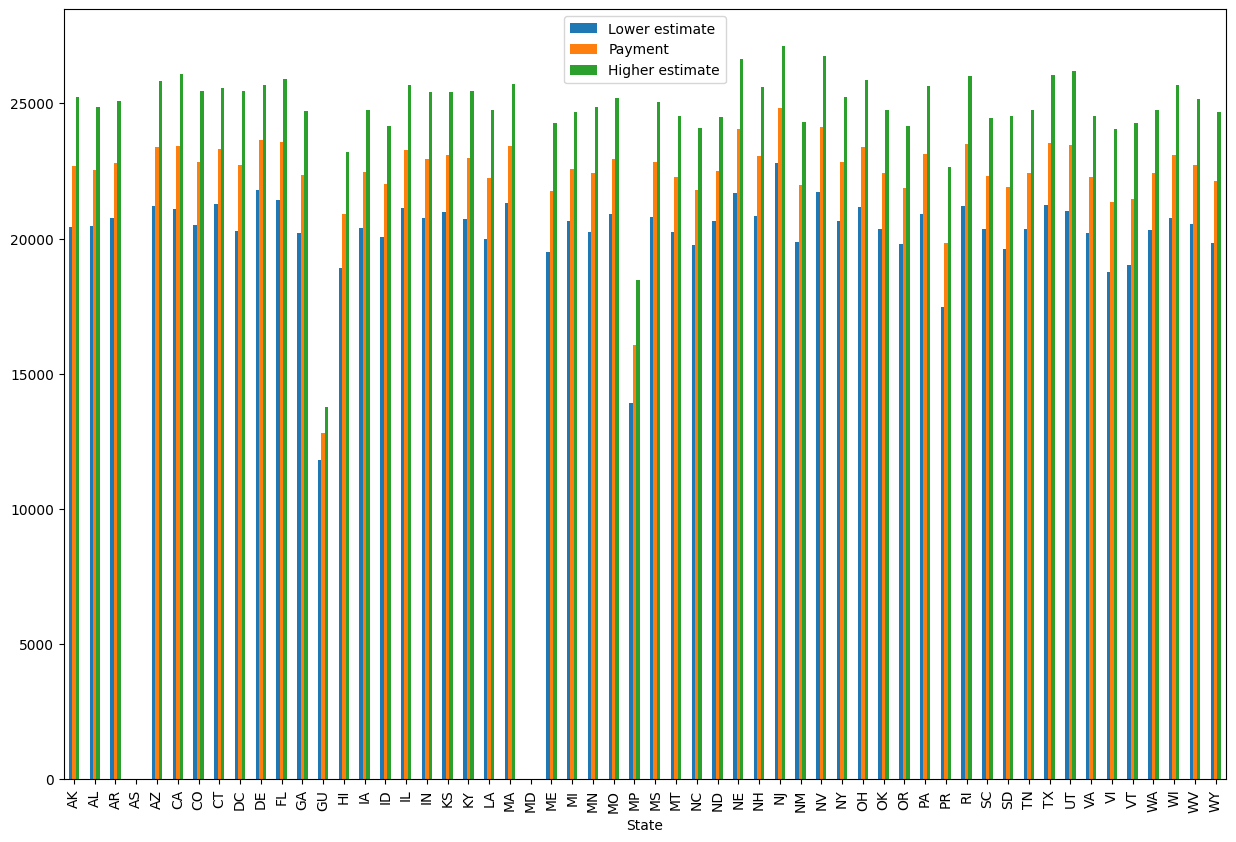

In [21]:
heart_graph_LE.plot(kind = 'bar', figsize=(15,10))

## Graph
Here we can see that hospital expectation is in between the range that too all are in the range of their average.

In [23]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [24]:
heart = pd.read_csv('heart.csv')
heart.Sex.unique()

array(['M', 'F'], dtype=object)

In [25]:
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [26]:
# Here I am changing the data type of gender to integer.
label_Encoding(data=stroke, column='gender',type ='int')

In [27]:
del stroke['id']
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [28]:
# Here I have renamed the columns names into title.
stroke = stroke.rename(str.title, axis = 'columns')

In [29]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [30]:
# Here I am filtering the data and I am creating a new column and assigning a value to it.
heart_htn = heart[heart['RestingBP'] >=140]
heart_htn['Hypertension'] = 1
heart_no_htn = heart[heart['RestingBP'] <140]
heart_no_htn['Hypertension'] = 0
dataframe =[heart_no_htn,heart_htn]
# Then I am concatenating the dataframes.
heart = pd.concat(dataframe,axis=0)

<ipython-input-30-d54f52bb443d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_htn['Hypertension'] = 1
<ipython-input-30-d54f52bb443d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_no_htn['Hypertension'] = 0


In [31]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Hypertension
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0,0


In [32]:
heart.Sex.nunique()

2

In [33]:
# Here i am using this function to replace the values.
value_replace(data = heart, column = 'Sex', replace = {'M':'Male','F':'Female'})

# heart['Sex'] = heart['Sex'].replace('M','Male')
# heart['Sex'] = heart['Sex'].replace('F','Female')
# heart['HeartDisease'] = le.fit_transform(heart['HeartDisease']).astype(int)

In [34]:
# I am changing minute changes in the columns
stroke.columns = ['Sex', 'Age', 'Hypertension', 'HeartDisease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'Bmi',
       'Smoking_Status', 'Stroke']

In [38]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Hypertension
2,37,Male,ATA,130,283,0,ST,98,N,0.0,Up,0,0
3,48,Female,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
5,39,Male,NAP,120,339,0,Normal,170,N,0.0,Up,0,0
6,45,Female,ATA,130,237,0,Normal,170,N,0.0,Up,0,0
7,54,Male,ATA,110,208,0,Normal,142,N,0.0,Up,0,0


In [39]:
stroke.head()

,Sex,Age,Hypertension,HeartDisease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Bmi,Smoking_Status,Stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [40]:
# Here I am changing the data type of Sex to integer.
label_Encoding(data=heart,column = 'Sex', type = 'int')

In [41]:
# I am joining stroke with heart using Age, Sex, HeartDisease and Hypertension columns using inner join.
merged = heart.merge(stroke,on = ['Age', 'Sex', 'HeartDisease', 'Hypertension'], how = 'inner').sort_values(by = 'Cholesterol')
merged

<ipython-input-41-a403c8708653>:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged = heart.merge(stroke,on = ['Age', 'Sex', 'HeartDisease', 'Hypertension'], how = 'inner').sort_values(by = 'Cholesterol')


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Hypertension,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,Bmi,Smoking_Status,Stroke
2135,60,1,ASY,130,0,1,ST,130,Y,1.1,Down,1,0,Yes,Private,Urban,91.92,35.9,smokes,1
7716,60,1,ASY,120,0,0,Normal,133,Y,2.0,Up,0,0,Yes,Govt_job,Rural,200.25,33.1,never smoked,0
7717,60,1,ASY,120,0,0,Normal,133,Y,2.0,Up,0,0,Yes,Private,Rural,234.45,36.8,formerly smoked,0
7718,60,1,ASY,120,0,0,Normal,133,Y,2.0,Up,0,0,Yes,Private,Rural,153.48,37.3,never smoked,0
3849,54,1,ASY,130,0,0,ST,117,Y,1.4,Flat,1,0,Yes,Govt_job,Urban,90.30,30.8,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8904,67,0,NAP,115,564,0,LVH,160,N,1.6,Flat,0,0,Yes,Self-employed,Urban,68.61,31.9,never smoked,0
8903,67,0,NAP,115,564,0,LVH,160,N,1.6,Flat,0,0,Yes,Govt_job,Rural,94.61,28.4,smokes,0
8912,67,0,NAP,115,564,0,LVH,160,N,1.6,Flat,0,0,Yes,Private,Urban,227.96,32.8,Unknown,0
3836,54,1,ASY,130,603,1,Normal,125,Y,1.0,Flat,1,0,Yes,Govt_job,Urban,222.46,35.7,never smoked,0


In [42]:
# Checking that how many duplicates are there.
merged.duplicated().sum()

0

In [43]:
# Checking that how many null datas are there in each column.
merged.isnull().sum()

Age                    0
Sex                    0
ChestPainType          0
RestingBP              0
Cholesterol            0
FastingBS              0
RestingECG             0
MaxHR                  0
ExerciseAngina         0
Oldpeak                0
ST_Slope               0
HeartDisease           0
Hypertension           0
Ever_Married           0
Work_Type              0
Residence_Type         0
Avg_Glucose_Level      0
Bmi                  404
Smoking_Status         0
Stroke                 0
dtype: int64

In [44]:
# Then I dropped all the rows containing null values
merged = merged.dropna()

In [45]:
merged.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Hypertension', 'Ever_Married', 'Work_Type',
       'Residence_Type', 'Avg_Glucose_Level', 'Bmi', 'Smoking_Status',
       'Stroke'],
      dtype='object')

In [46]:
# Checking the values counts for imbalace in stroke.
merged.Stroke.value_counts()

0    9195
1     376
Name: Stroke, dtype: int64

In [47]:
# We are rounding the decimal to integer
merged['Bmi'] = round(merged['Bmi'])

<ipython-input-47-1c1f82293565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['Bmi'] = round(merged['Bmi'])


In [50]:
import requests
dia = requests.get('https://data.mendeley.com/public-files/datasets/wj9rwkp9c2/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_downloaded')
df= []
for i in dia.text.split('\r')[1:-1]:
  i = i.split(',')
  df.append(i)
diabetes = pd.DataFrame(df, columns = dia.text.split('\r')[0].split(','))

# Rounding the bmi after converting it to a float.
diabetes['BMI'] = round(diabetes['BMI'].astype(float))

# Converting my column names to title.
diabetes = diabetes.rename(str.title, axis = 'columns')
del diabetes['Id']
del diabetes['No_Pation']
diabetes

,Gender,Age,Urea,Cr,Hba1C,Chol,Tg,Hdl,Ldl,Vldl,Bmi,Class
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1,0.8,2,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,71,11,97,7,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,M,31,3,60,12.3,4.1,2.2,0.7,2.4,15.4,37.0,Y
997,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.0,Y
998,M,38,5.8,59,6.7,5.3,2,1.6,2.9,14,40.0,Y


The formula used to convert µmol/L to Milligram per Deciliter is 1 Micromole per Liter = 0.0113096584483149 Milligram per Deciliter.

In [52]:
# Changinging the Cr column to float
diabetes['Cr'] = diabetes['Cr'].astype(float)

# Converting mmol/lit to mg/dl
diabetes['Cr'] = round(0.0113096584483149*diabetes['Cr'],2)

# we are encoding the column into integers that too we convert into numericals as per alphabetical order.
label_Encoding(data =diabetes, column = 'Class', type = 'int')

# Replacing the values in a column.
value_replace(data = diabetes, column = 'Gender', replace = {'F':'Female','M':'Male','f':'Female'})

# Converting the datatype to integer.
diabetes['Age'] = diabetes['Age'].astype(int)

# Converting the mmol/litre to mg/dl
diabetes['Chol'] = round(diabetes['Chol'].astype(float)*18.0182)

In [57]:
# Changing cholesterol column name from Chol to Cholesterol.
diabetes.columns = ['Sex', 'Age', 'Urea', 'Cr', 'Hba1C', 'Cholesterol', 'Tg', 'Hdl', 'Ldl',
       'Vldl', 'Bmi', 'Diabetes']

# Encoding the Sex Column with integers.
label_Encoding(diabetes, 'Sex', 'int')

In [53]:
merged.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'Diabetes',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Hypertension', 'Ever_Married', 'Work_Type',
       'Residence_Type', 'Avg_Glucose_Level', 'Bmi', 'Smoking_Status',
       'Stroke']

In [54]:
# Converting the values of Cholesterol with a condition into 0 and 1
merged_less = merged[merged['Cholesterol'] > 200]
merged_less['Cholesterol'] = 1
merged_more = merged[merged['Cholesterol'] <= 200]
merged_more['Cholesterol'] = 0

df = [merged_less, merged_more]

merged =pd.concat(df, axis = 0)

<ipython-input-54-94310a7db89c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_less['Cholesterol'] = 1
<ipython-input-54-94310a7db89c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_more['Cholesterol'] = 0


In [55]:
merged.dtypes, diabetes.dtypes

(Age                    int64
 Sex                    int64
 ChestPainType         object
 RestingBP              int64
 Cholesterol            int64
 Diabetes               int64
 RestingECG            object
 MaxHR                  int64
 ExerciseAngina        object
 Oldpeak              float64
 ST_Slope              object
 HeartDisease           int64
 Hypertension           int64
 Ever_Married          object
 Work_Type             object
 Residence_Type        object
 Avg_Glucose_Level    float64
 Bmi                  float64
 Smoking_Status        object
 Stroke                 int64
 dtype: object,
 Gender     object
 Age         int64
 Urea       object
 Cr        float64
 Hba1C      object
 Chol      float64
 Tg         object
 Hdl        object
 Ldl        object
 Vldl       object
 Bmi       float64
 Class       int64
 dtype: object)

In [58]:
# Merging the dataset with diabetes dataset using Sex, Diabetes and Bmi columns using inner join.
merged = merged.merge(diabetes, how = 'inner', on = ['Sex', 'Diabetes', 'Bmi'])

In [59]:
merged.columns

Index(['Age_x', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol_x',
       'Diabetes', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope', 'HeartDisease', 'Hypertension', 'Ever_Married', 'Work_Type',
       'Residence_Type', 'Avg_Glucose_Level', 'Bmi', 'Smoking_Status',
       'Stroke', 'Age_y', 'Urea', 'Cr', 'Hba1C', 'Cholesterol_y', 'Tg', 'Hdl',
       'Ldl', 'Vldl'],
      dtype='object')

In [61]:
# Selecting the required columns in required order.
merged = merged[['Age_x', 'Sex', 'ChestPainType', 'RestingBP', 'Diabetes',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Hypertension', 'Avg_Glucose_Level', 'Bmi', 'Urea',
       'Cr', 'Hba1C', 'Cholesterol_y', 'Tg', 'Hdl', 'Ldl', 'Vldl', 'Stroke']]

In [62]:
# Altering column names.
merged.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Diabetes', 'RestingECG',
       'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease',
       'Hypertension', 'Avg_Glucose_Level', 'Bmi', 'Urea', 'Cr', 'Hba1C',
       'Cholesterol', 'Tg', 'Hdl', 'Ldl', 'Vldl', 'Stroke']

In [63]:
!pip install imblearn

In [64]:
merged.Stroke.value_counts()

0    13203
1      152
Name: Stroke, dtype: int64

In [65]:
# Here I am balancing the data using output data.
# We have two types of balancine 1. oversampling, 2. under-sampling
# where oversampling means creating the low count category to match the large count category as undersampling is viceversa.
# There were disadvantages too such as over fitting in over sampling and lose of real data during under sampling.
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler()
x= merged[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Diabetes', 'RestingECG',
       'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease',
       'Hypertension', 'Avg_Glucose_Level', 'Bmi', 'Urea', 'Cr', 'Hba1C',
       'Cholesterol', 'Tg', 'Hdl', 'Ldl', 'Vldl']]
y = merged['Stroke']
x_rus, y_rus = ROS.fit_resample(x,y)
columns = [x_rus,y_rus]
merged = pd.concat(columns, axis = 1)
merged

,Age,Sex,ChestPainType,RestingBP,Diabetes,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Hypertension,Avg_Glucose_Level,Bmi,Urea,Cr,Hba1C,Cholesterol,Tg,Hdl,Ldl,Vldl,Stroke
0,43,0,ATA,120,0,Normal,165,N,0.0,Up,0,0,115.22,21.0,2.3,0.00,4,937.0,1,1,1.5,0.4,0
1,43,0,ATA,120,0,Normal,165,N,0.0,Up,0,0,115.22,21.0,3.3,0.01,4,1297.0,1.1,0.9,2.7,1,0
2,43,0,ATA,120,0,Normal,165,N,0.0,Up,0,0,115.22,21.0,5.9,0.01,5.4,1712.0,0.8,1.1,4.1,0.3,0
3,43,0,ATA,120,0,Normal,165,N,0.0,Up,0,0,115.22,21.0,3.2,0.01,5,1496.0,1.3,1,3,0.6,0
4,43,0,ATA,120,0,Normal,165,N,0.0,Up,0,0,115.22,21.0,2,0.00,5.1,973.0,1.2,0.6,2,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26401,71,0,ASY,112,0,Normal,125,N,1.6,Flat,0,0,193.94,22.0,4.6,0.01,0.9,1045.0,1.3,0.9,3,1.1,1
26402,71,0,ASY,112,0,Normal,125,N,1.6,Flat,0,0,193.94,22.0,4.7,0.01,4.1,1459.0,1.8,1.8,1.8,1.3,1
26403,66,1,ASY,120,0,LVH,151,N,0.4,Flat,0,0,76.46,21.0,5.8,0.01,4,649.0,1.2,1.3,3,0.8,1
26404,63,0,ATA,132,0,Normal,130,N,0.1,Up,0,0,106.58,24.0,3.6,0.01,5.4,2108.0,1.8,1.5,4.2,0.8,1


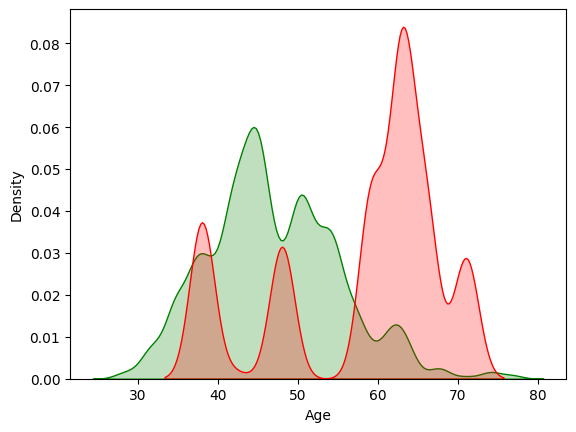

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
non_stroke_age = merged[merged["Stroke"]==0]
stroke_age = merged[merged["Stroke"]==1]
sns.kdeplot(non_stroke_age['Age'], fill=True, color = 'g')
sns.kdeplot(stroke_age['Age'], fill=True, color = 'r')
plt.show()

In [67]:
merged.isnull().sum()

Age                  0
Sex                  0
ChestPainType        0
RestingBP            0
Diabetes             0
RestingECG           0
MaxHR                0
ExerciseAngina       0
Oldpeak              0
ST_Slope             0
HeartDisease         0
Hypertension         0
Avg_Glucose_Level    0
Bmi                  0
Urea                 0
Cr                   0
Hba1C                0
Cholesterol          0
Tg                   0
Hdl                  0
Ldl                  0
Vldl                 0
Stroke               0
dtype: int64

In [68]:
merged.head()

,Age,Sex,ChestPainType,RestingBP,Diabetes,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Hypertension,Avg_Glucose_Level,Bmi,Urea,Cr,Hba1C,Cholesterol,Tg,Hdl,Ldl,Vldl,Stroke
0,43,0,ATA,120,0,Normal,165,N,0.0,Up,0,0,115.22,21.0,2.3,0.00,4,937.0,1,1,1.5,0.4,0
1,43,0,ATA,120,0,Normal,165,N,0.0,Up,0,0,115.22,21.0,3.3,0.01,4,1297.0,1.1,0.9,2.7,1,0
2,43,0,ATA,120,0,Normal,165,N,0.0,Up,0,0,115.22,21.0,5.9,0.01,5.4,1712.0,0.8,1.1,4.1,0.3,0
3,43,0,ATA,120,0,Normal,165,N,0.0,Up,0,0,115.22,21.0,3.2,0.01,5,1496.0,1.3,1,3,0.6,0
4,43,0,ATA,120,0,Normal,165,N,0.0,Up,0,0,115.22,21.0,2,0.00,5.1,973.0,1.2,0.6,2,0.5,0


In [69]:
# Saving the dataframe as a CSV file.
merged.to_csv('Research_Data.csv')

In [70]:
col = [ 'ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for column in col:
  merged[column] = le.fit_transform(merged[column]).astype(int)

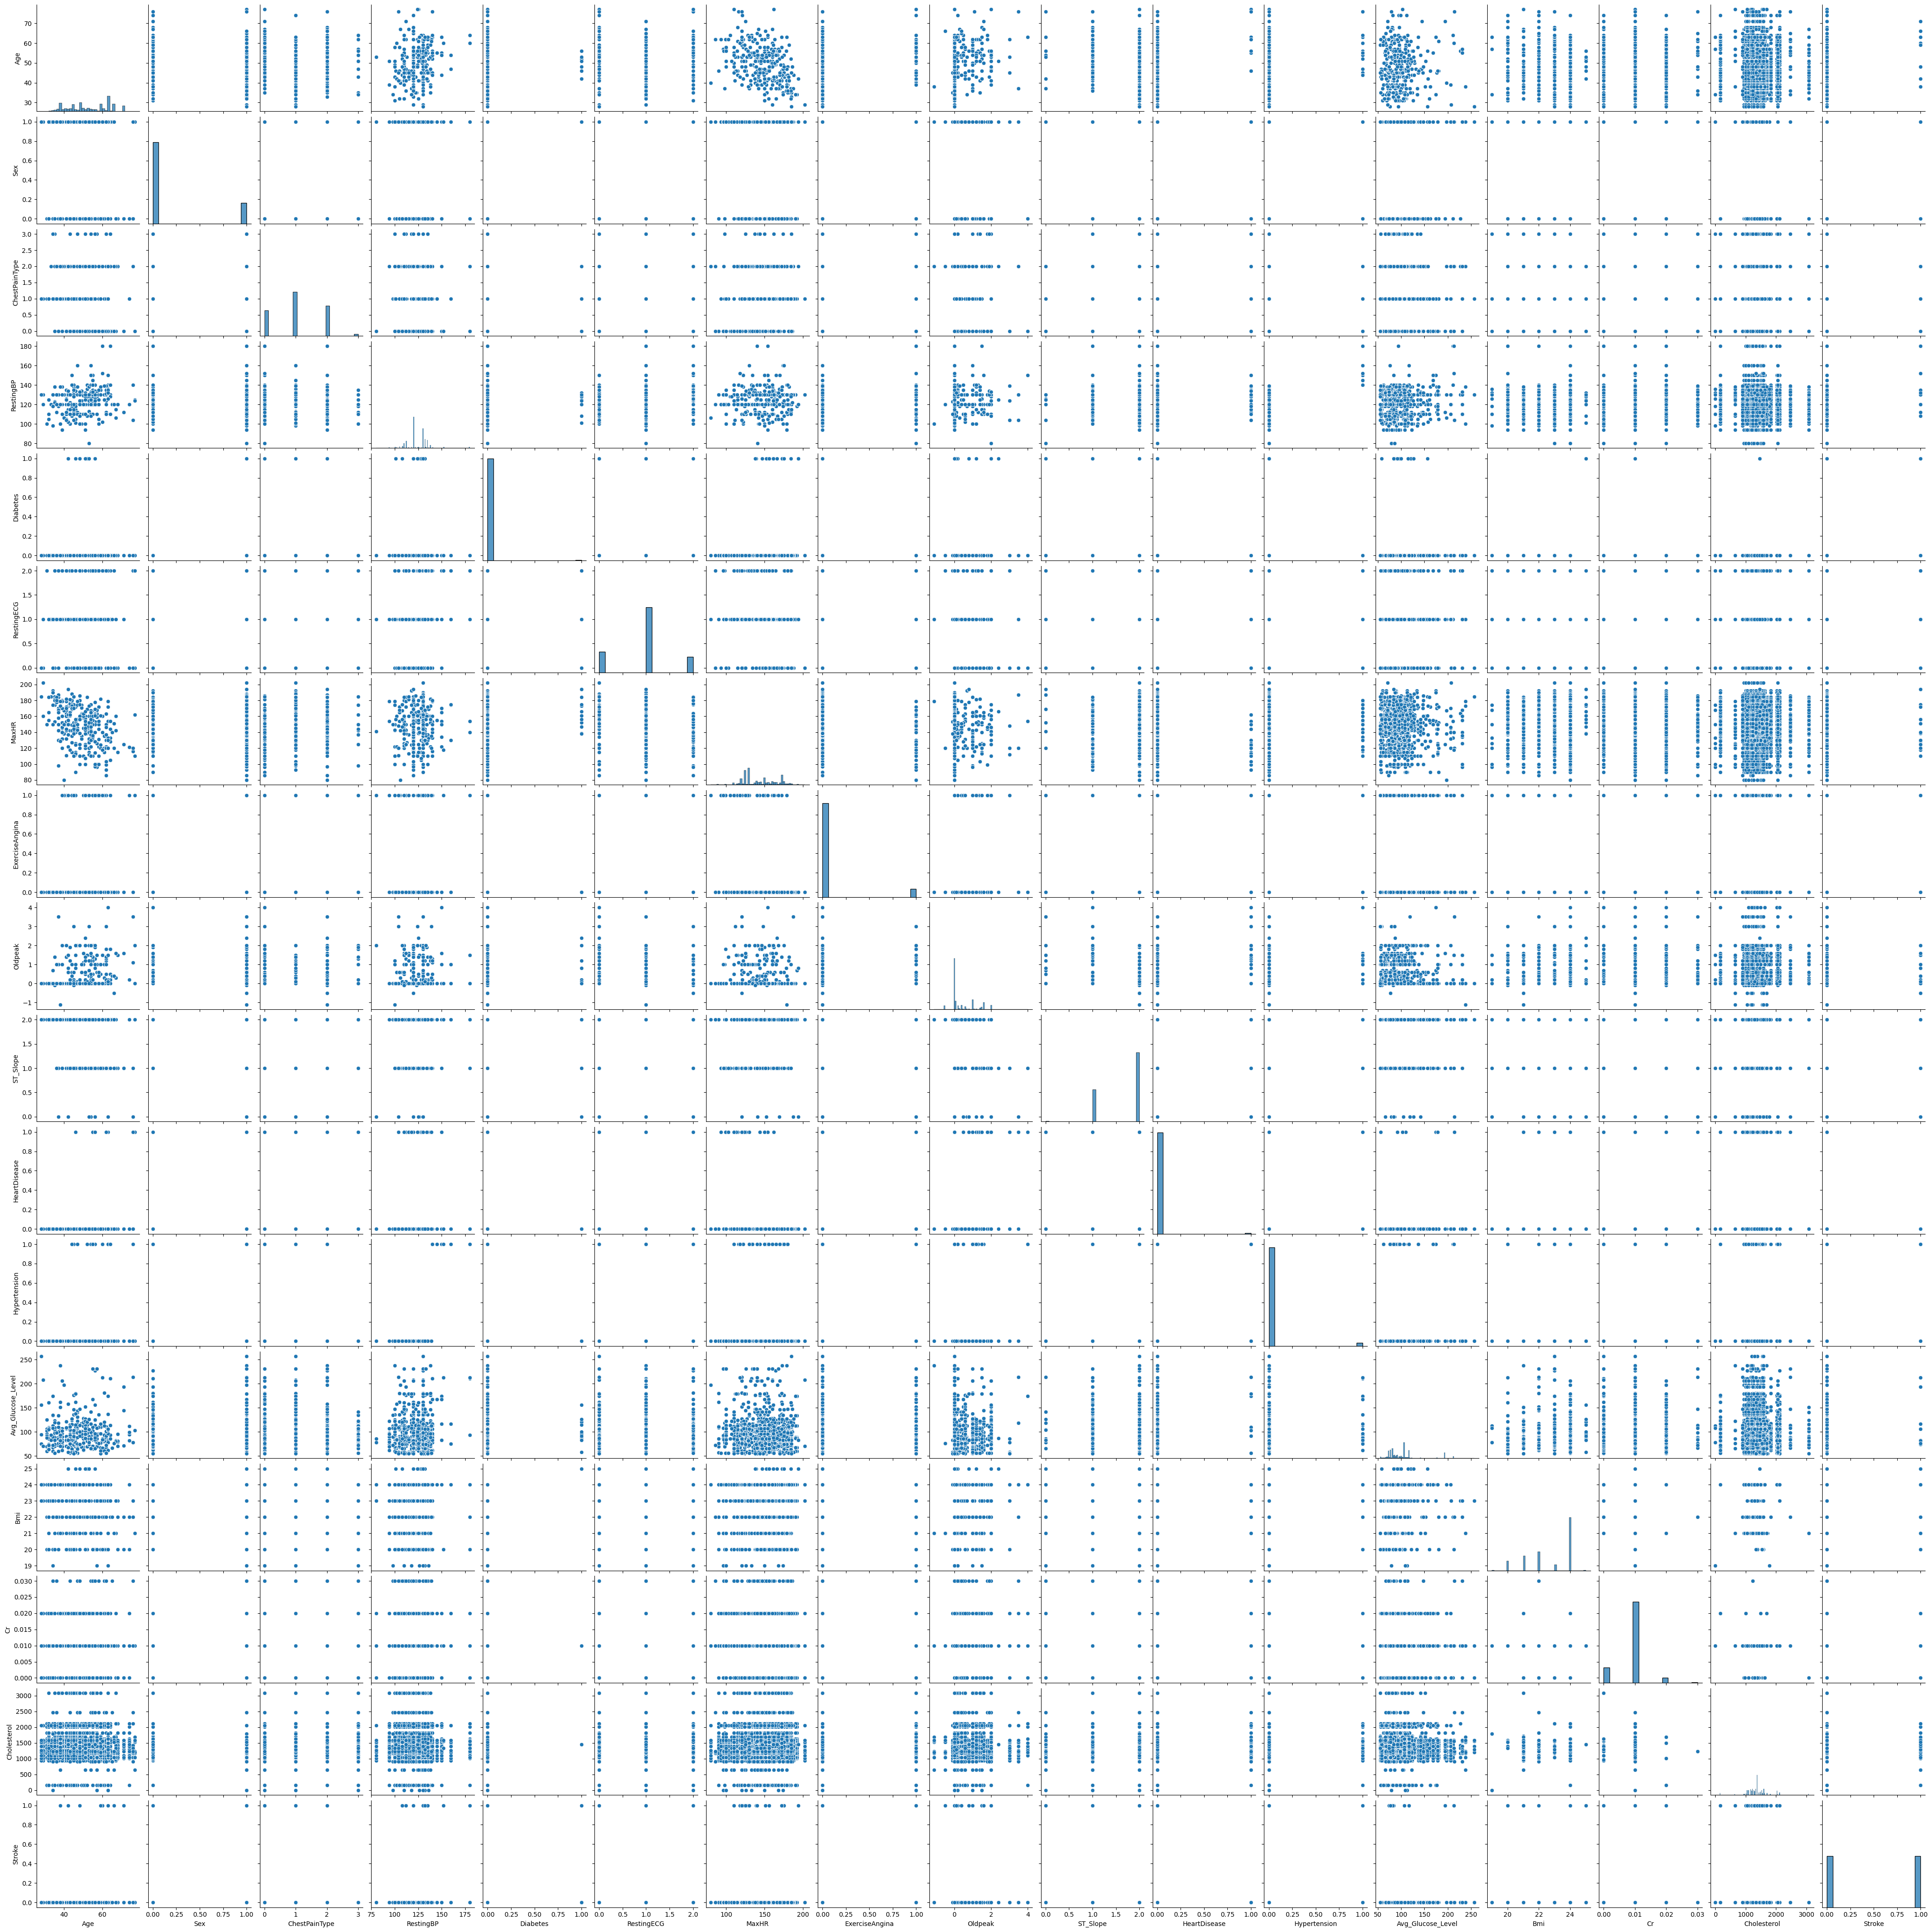

In [71]:
sns.pairplot(merged)

In [89]:
ml_model_dataset = pd.read_csv('Research_Data.csv')
ml_model_dataset

,Unnamed: 0,Age,Sex,ChestPainType,RestingBP,Diabetes,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Hypertension,Avg_Glucose_Level,Bmi,Urea,Cr,Hba1C,Cholesterol,Tg,Hdl,Ldl,Vldl,Stroke
0,0,43,0,ATA,120,0,Normal,165,N,0.0,Up,0,0,115.22,21.0,2.3,0.00,4.0,937.0,1.0,1.0,1.5,0.4,0
1,1,43,0,ATA,120,0,Normal,165,N,0.0,Up,0,0,115.22,21.0,3.3,0.01,4.0,1297.0,1.1,0.9,2.7,1.0,0
2,2,43,0,ATA,120,0,Normal,165,N,0.0,Up,0,0,115.22,21.0,5.9,0.01,5.4,1712.0,0.8,1.1,4.1,0.3,0
3,3,43,0,ATA,120,0,Normal,165,N,0.0,Up,0,0,115.22,21.0,3.2,0.01,5.0,1496.0,1.3,1.0,3.0,0.6,0
4,4,43,0,ATA,120,0,Normal,165,N,0.0,Up,0,0,115.22,21.0,2.0,0.00,5.1,973.0,1.2,0.6,2.0,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26401,26401,71,0,ASY,112,0,Normal,125,N,1.6,Flat,0,0,193.94,22.0,4.6,0.01,0.9,1045.0,1.3,0.9,3.0,1.1,1
26402,26402,71,0,ASY,112,0,Normal,125,N,1.6,Flat,0,0,193.94,22.0,4.7,0.01,4.1,1459.0,1.8,1.8,1.8,1.3,1
26403,26403,66,1,ASY,120,0,LVH,151,N,0.4,Flat,0,0,76.46,21.0,5.8,0.01,4.0,649.0,1.2,1.3,3.0,0.8,1
26404,26404,63,0,ATA,132,0,Normal,130,N,0.1,Up,0,0,106.58,24.0,3.6,0.01,5.4,2108.0,1.8,1.5,4.2,0.8,1


In [97]:
ml_model_dataset = ml_model_dataset.drop(columns=['Unnamed: 0'])

<Axes: >

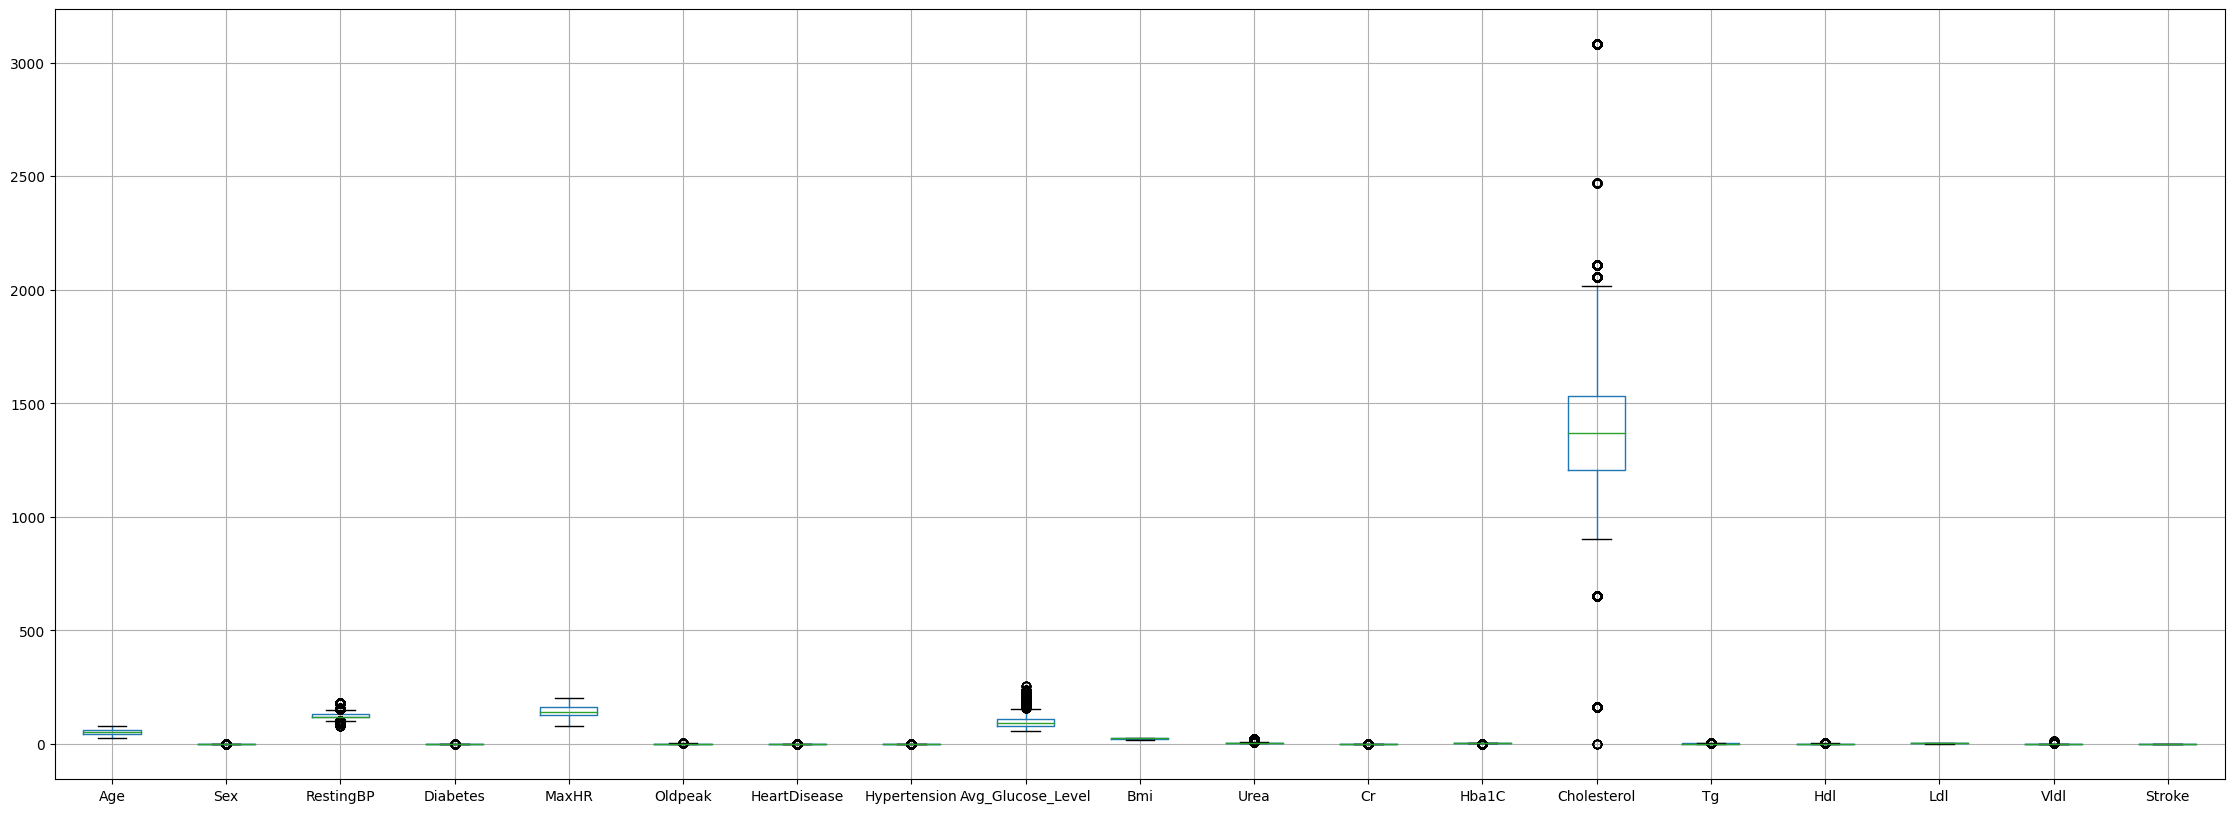

In [98]:
ml_model_dataset.boxplot(figsize=(28,10))